In [1]:
import os

import dlib
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
dlib.__version__

'19.24.1'

In [3]:
detector = dlib.get_frontal_face_detector()
img = cv2.imread('HumanFace.png', cv2.IMREAD_GRAYSCALE)

In [4]:
faces = detector(img, 1)

In [5]:
face_out = img.copy()

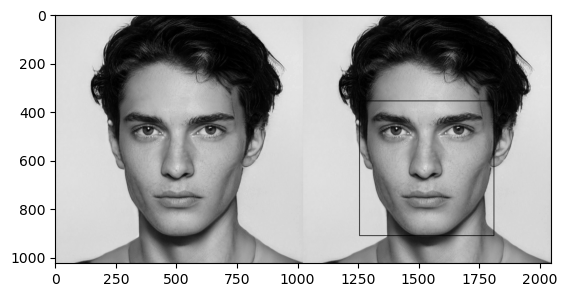

In [6]:
# x, y, w, h = faces[0]
# cv2.rectangle(face_out, (x, y), (x + w, y + h), [0, 255, 0], 1)
left = faces[0].left()
top = faces[0].top()
right = faces[0].right()
bottom = faces[0].bottom()
cv2.rectangle(face_out, (left, top), (right, bottom), [0, 0, 0], 2)
final_img = np.hstack([img, face_out])
plt.imshow(final_img, 'gray')

In [7]:
img_multifaces = cv2.imread('Human_Faces.png', cv2.IMREAD_COLOR)
%timeit faces = detector(img_multifaces, 1)

46.2 ms ± 399 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


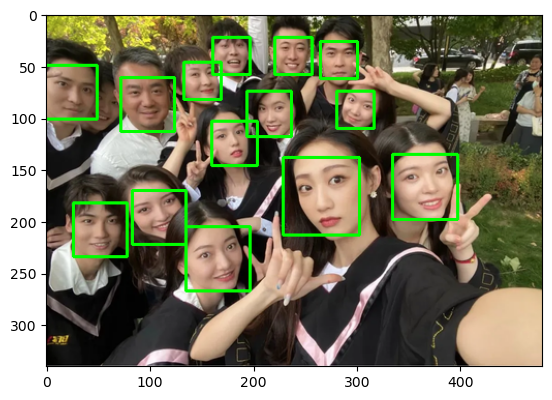

In [23]:
img_multifaces_2 = img_multifaces.copy()
for face in faces:
    left = face.left()
    top = face.top()
    right = face.right()
    bottom = face.bottom()
    cv2.rectangle(img_multifaces_2, (left, top), (right, bottom), [0, 255, 0], 2)
# final_img = np.hstack(img_multifaces, img_multifaces_2)
plt.imshow(img_multifaces_2[:, :, ::-1])

In [24]:
# shape_predictor_68_face_landmarks.dat
# 找出人脸的特征点
img = cv2.imread('HumanFace.png', cv2.IMREAD_COLOR)
detector = dlib.get_frontal_face_detector()
model = '/Users/outianyi/Computer_Vision/shape_predictor_68_face_landmarks.dat'
predictor = dlib.shape_predictor(model)

In [25]:
faces = detector(img, 1)

In [26]:
face = faces[0]
left = face.left()
top = face.top()
right = face.right()
bottom = face.bottom()
#
img2 = img.copy()
cv2.rectangle(img2, (left, top), (right, bottom), [0, 255, 0], 2)
shape = predictor(img, face)

In [27]:
shape.parts()

points[(257, 476), (264, 544), (281, 611), (294, 677), (310, 742), (343, 804), (386, 859), (439, 905), (512, 917), (586, 907), (649, 863), (702, 810), (744, 747), (765, 680), (777, 610), (790, 542), (795, 471), (273, 440), (310, 409), (361, 408), (410, 418), (456, 441), (547, 441), (598, 419), (650, 411), (702, 411), (747, 435), (503, 488), (502, 539), (501, 591), (500, 642), (457, 665), (478, 676), (503, 686), (530, 675), (555, 665), (337, 484), (366, 465), (405, 467), (436, 495), (400, 502), (363, 502), (588, 493), (618, 466), (657, 463), (688, 482), (662, 499), (624, 500), (414, 755), (448, 738), (481, 727), (507, 737), (535, 728), (570, 740), (604, 758), (569, 783), (534, 795), (505, 797), (476, 794), (444, 783), (431, 758), (480, 755), (507, 758), (536, 754), (586, 759), (533, 754), (505, 758), (478, 754)]

In [28]:
for idx, pt in enumerate(shape.parts()):
    pt_pos = (pt.x, pt.y)
    cv2.circle(img, pt_pos, 4, (0, 255, 0), -1)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img, str(idx + 1), pt_pos, font, 1, (255, 0, 0), 1, cv2.LINE_AA)

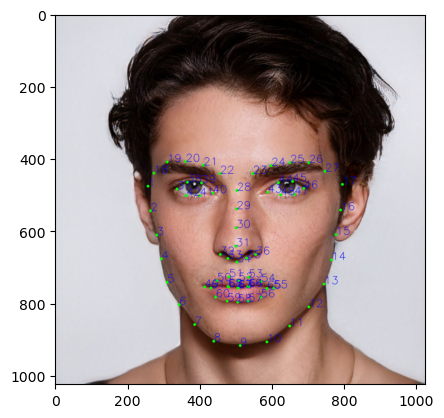

In [29]:
plt.imshow(img[:, :, ::-1])

In [30]:
# use multifaces
detector = dlib.get_frontal_face_detector()
predictor =  dlib.shape_predictor(model)

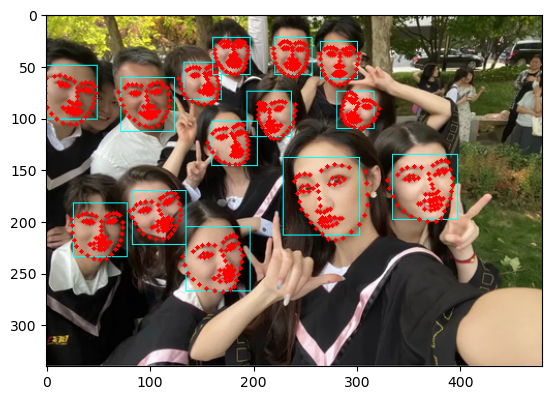

In [31]:
img_multifaces_2 = img_multifaces.copy()
faces = detector(img_multifaces, 1)
face_vectors = []  # to save the face vectors
for face in faces:
        left = face.left()
        top = face.top()
        right = face.right()
        bottom = face.bottom()
        cv2.rectangle(img_multifaces_2, (left, top), (right, bottom), [255, 255, 0], 1)
        shape = predictor(img_multifaces, face)
        for pt in shape.parts():
            pt_pos = (pt.x, pt.y)
            cv2.circle(img_multifaces_2, pt_pos, 2, (0, 0, 255), -1)

plt.imshow(img_multifaces_2[:, :, ::-1])

In [32]:
# 计算距离的函数（欧式距离）
def distance(a, b):
    return np.linalg.norm(np.array(a) - np.array(b), ord=2)

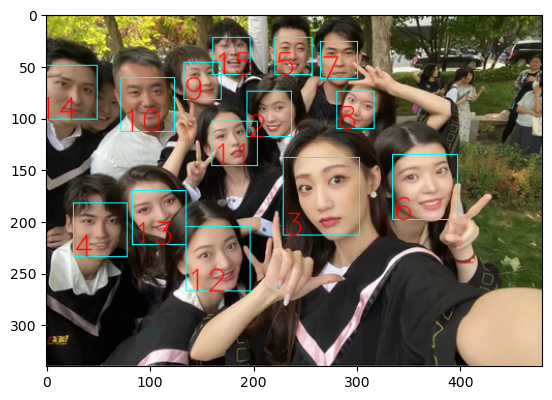

In [33]:
facerec_model = "/Users/outianyi/Computer_Vision/dlib_face_recognition_resnet_model_v1.dat"
face_recognizer = dlib.face_recognition_model_v1(facerec_model)
model = '/Users/outianyi/Computer_Vision/shape_predictor_68_face_landmarks.dat'
predictor = dlib.shape_predictor(model)
face_vectors = []
img_multifaces_2 = img_multifaces.copy()
faces = detector(img_multifaces, 1)
count = 0
for face in faces:
    count += 1
    left = face.left()
    top = face.top()
    right = face.right()
    bottom = face.bottom()
    cv2.rectangle(img_multifaces_2, (left, top), (right, bottom), [255, 255, 0], 1)
    shape = predictor(img, face)
    face_descriprtor = face_recognizer.compute_face_descriptor(img_multifaces, shape)
    face_vectors.append(["No %d" % count, face_descriprtor])
    # cv2.putText(img, str(idx + 1), pt_pos, font, 1, (255, 0, 0), 1, cv2.LINE_AA)
    cv2.putText(img_multifaces_2, str(count+1), (left, bottom), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 1, cv2.LINE_AA)
plt.imshow(img_multifaces_2[:, :, ::-1])

In [34]:
face_vectors

[['No 1',
  dlib.vector([-0.073916, 0.0245956, 0.110112, -0.0621698, -0.159727, -0.0578306, -0.0344907, -0.141214, 0.122795, -0.109369, 0.248952, -0.117169, -0.231907, -0.00558949, -0.0899743, 0.242048, -0.237439, -0.140283, -0.0214611, -0.0566024, 0.0517024, 0.0283217, 0.0315585, 0.11921, -0.0622087, -0.436345, -0.108982, -0.0797947, 0.00893043, -0.0304656, 0.0177295, 0.094543, -0.21109, -0.0125565, 0.0628091, 0.0348883, 0.0243255, -0.109817, 0.13951, -0.0460784, -0.292941, -0.0206864, 0.130764, 0.215673, 0.13275, 0.0284048, 0.0300297, -0.115128, 0.0499329, -0.153001, 0.0200088, 0.166893, 0.100214, 0.0194225, 0.0126236, -0.175076, 0.0236553, 0.100276, -0.156816, -0.0215909, 0.10086, -0.0155608, 0.0129141, -0.105497, 0.24144, 0.0444771, -0.154543, -0.173761, 0.181692, -0.164768, -0.0377179, 0.0297693, -0.170565, -0.212763, -0.273781, -0.00800394, 0.444477, 0.116801, -0.225669, 0.0738832, -0.0930852, 0.0249182, 0.0438452, 0.206418, 0.00529247, 0.0879841, -0.088767, -0.00915758, 0.120482

In [35]:
# 计算每两个向量之间的欧式距离
distance(face_vectors[0][1], face_vectors[1][1])

0.6236492725069541

In [36]:
distance(face_vectors[2][1], face_vectors[1][1])

0.570918660417248

In [37]:
for i in range(len(face_vectors) - 1):
    print(distance(face_vectors[i + 1][1], face_vectors[1][1]))

0.0
0.570918660417248
0.5012633343139897
0.5302289844833085
0.6573728009327726
0.5061548232145754
0.4962059627739876
0.5723442282325807
0.4763328731969915
0.6235909903810358
0.5758942478673413
0.7619953857354694
0.5090717608155855


In [39]:
import os
path = '/Users/outianyi/Computer_Vision/lfw-deepfunneled/Andrei_Mikhnevich'
pics_list = os.listdir(path)

In [41]:
for i in range(2):
    pics_list[i] = os.path.join(path, pics_list[i])
pics_list

['/Users/outianyi/Computer_Vision/lfw-deepfunneled/Andrei_Mikhnevich/Andrei_Mikhnevich_0001.jpg',
 '/Users/outianyi/Computer_Vision/lfw-deepfunneled/Andrei_Mikhnevich/Andrei_Mikhnevich_0002.jpg']

In [44]:
# 保存成 pd， 试一下能不能转换回来
img1, img2 = cv2.imread(pics_list[0], cv2.IMREAD_COLOR), cv2.imread(pics_list[1], cv2.IMREAD_COLOR)
[img1.shape, img2.shape]

[(250, 250, 3), (250, 250, 3)]

In [47]:
face1 = detector(img1, 1)[0]
face2 = detector(img2, 1)[0]
shape1 = predictor(img1, face1)
shape2 = predictor(img2, face2)

In [48]:
descriptor1 = face_recognizer.compute_face_descriptor(img1, shape1)
descriptor2 = face_recognizer.compute_face_descriptor(img2, shape2)
[len(descriptor1), len(descriptor2)]

[128, 128]

In [49]:
[type(descriptor1), type(list(descriptor1))]

[_dlib_pybind11.vector, list]

In [50]:
list_desc1 = list(descriptor1)
list_desc1

[-0.11305341124534607,
 0.07130087167024612,
 0.03195417672395706,
 -0.11276445537805557,
 -0.06397565454244614,
 -0.05590999871492386,
 0.06362923979759216,
 -0.05477428063750267,
 0.13098332285881042,
 -0.12920698523521423,
 0.2823966145515442,
 -0.005000945180654526,
 -0.28396204113960266,
 -0.13484114408493042,
 0.09389091283082962,
 0.10821624100208282,
 -0.11461183428764343,
 -0.12613603472709656,
 -0.15546464920043945,
 -0.051740989089012146,
 0.08401632308959961,
 0.01924961805343628,
 -0.06046842038631439,
 0.05021488666534424,
 -0.09126358479261398,
 -0.3505411148071289,
 -0.022986017167568207,
 -0.03963208571076393,
 0.06323083490133286,
 -0.14131729304790497,
 -0.04596559703350067,
 0.08973805606365204,
 -0.17283864319324493,
 -0.1260368674993515,
 0.0167682021856308,
 0.07249496877193451,
 -0.09447358548641205,
 -0.05400940775871277,
 0.19293531775474548,
 0.010070695541799068,
 -0.22494712471961975,
 -0.005661770701408386,
 0.0191025473177433,
 0.2727237045764923,
 0.2172

In [52]:
str_desc1 = str(list_desc1)
str_desc1

'[-0.11305341124534607, 0.07130087167024612, 0.03195417672395706, -0.11276445537805557, -0.06397565454244614, -0.05590999871492386, 0.06362923979759216, -0.05477428063750267, 0.13098332285881042, -0.12920698523521423, 0.2823966145515442, -0.005000945180654526, -0.28396204113960266, -0.13484114408493042, 0.09389091283082962, 0.10821624100208282, -0.11461183428764343, -0.12613603472709656, -0.15546464920043945, -0.051740989089012146, 0.08401632308959961, 0.01924961805343628, -0.06046842038631439, 0.05021488666534424, -0.09126358479261398, -0.3505411148071289, -0.022986017167568207, -0.03963208571076393, 0.06323083490133286, -0.14131729304790497, -0.04596559703350067, 0.08973805606365204, -0.17283864319324493, -0.1260368674993515, 0.0167682021856308, 0.07249496877193451, -0.09447358548641205, -0.05400940775871277, 0.19293531775474548, 0.010070695541799068, -0.22494712471961975, -0.005661770701408386, 0.0191025473177433, 0.2727237045764923, 0.2172299325466156, -0.0009171031415462494, 0.014

In [54]:
import ast
remake_desc1 = ast.literal_eval(str_desc1)
type(remake_desc1)

list